**1) Há a necessidade de criar um esquema que utilize quatro formas bastante conhecidas de ordenação:
bubble sort, insertion sort, merge sort e quick sort. Coloque-as no padrão Strategy e escreva um
cliente que alterna a estratégia de ordenação**

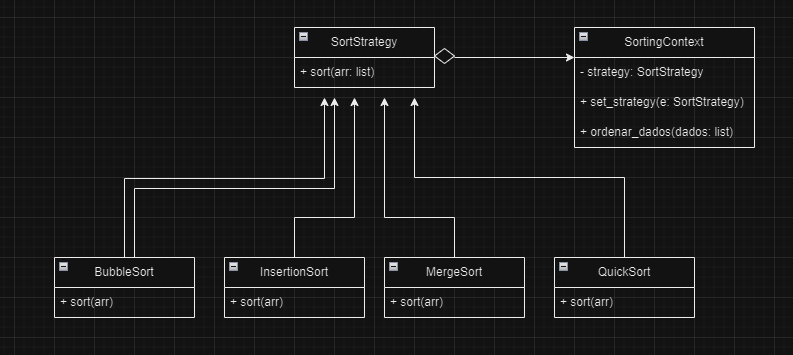

In [ ]:
from abc import ABC, abstractmethod

class SortStrategy(ABC):
    @abstractmethod
    def ordenar(self, dados):
        pass

class BubbleSort(SortStrategy):
    def ordenar(self, dados):
        n = len(dados)
        for i in range(n):
            for j in range(0, n - i - 1):
                if dados[j] > dados[j + 1]:
                    dados[j], dados[j + 1] = dados[j + 1], dados[j]
        return dados

class InsertionSort(SortStrategy):
    def ordenar(self, dados):
        for i in range(1, len(dados)):
            chave = dados[i]
            j = i - 1
            while j >= 0 and chave < dados[j]:
                dados[j + 1] = dados[j]
                j -= 1
            dados[j + 1] = chave
        return dados

class MergeSort(SortStrategy):
    def ordenar(self, dados):
        if len(dados) > 1:
            meio = len(dados) // 2
            esquerda = dados[:meio]
            direita = dados[meio:]

            self.ordenar(esquerda)
            self.ordenar(direita)

            i = j = k = 0
            while i < len(esquerda) and j < len(direita):
                if esquerda[i] < direita[j]:
                    dados[k] = esquerda[i]
                    i += 1
                else:
                    dados[k] = direita[j]
                    j += 1
                k += 1

            while i < len(esquerda):
                dados[k] = esquerda[i]
                i += 1
                k += 1

            while j < len(direita):
                dados[k] = direita[j]
                j += 1
                k += 1
        return dados

class QuickSort(SortStrategy):
    def ordenar(self, dados):
        self.quick_sort(dados, 0, len(dados) - 1)
        return dados

    def quick_sort(self, dados, low, high):
        if low < high:
            pi = self.particionar(dados, low, high)
            self.quick_sort(dados, low, pi - 1)
            self.quick_sort(dados, pi + 1, high)

    def particionar(self, dados, low, high):
        pivo = dados[high]
        i = low - 1
        for j in range(low, high):
            if dados[j] <= pivo:
                i += 1
                dados[i], dados[j] = dados[j], dados[i]
        dados[i + 1], dados[high] = dados[high], dados[i + 1]
        return i + 1

class SortingContext:
    def __init__(self, estrategia: SortStrategy):
        self.estrategia = estrategia

    def set_estrategia(self, estrategia: SortStrategy):
        self.estrategia = estrategia

    def ordenar_dados(self, dados):
        return self.estrategia.ordenar(dados)

In [ ]:
dados = [64, 34, 25, 12, 22, 11, 90]

contexto = SortingContext(BubbleSort())
print("Bubble Sort:", contexto.ordenar_dados(dados.copy()))

contexto.set_estrategia(InsertionSort())
print("Insertion Sort:", contexto.ordenar_dados(dados.copy()))

contexto.set_estrategia(MergeSort())
print("Merge Sort:", contexto.ordenar_dados(dados.copy()))

contexto.set_estrategia(QuickSort())
print("Quick Sort:", contexto.ordenar_dados(dados.copy()))

**2. Implementação do Padrão Strategy com Personagens e Armas**

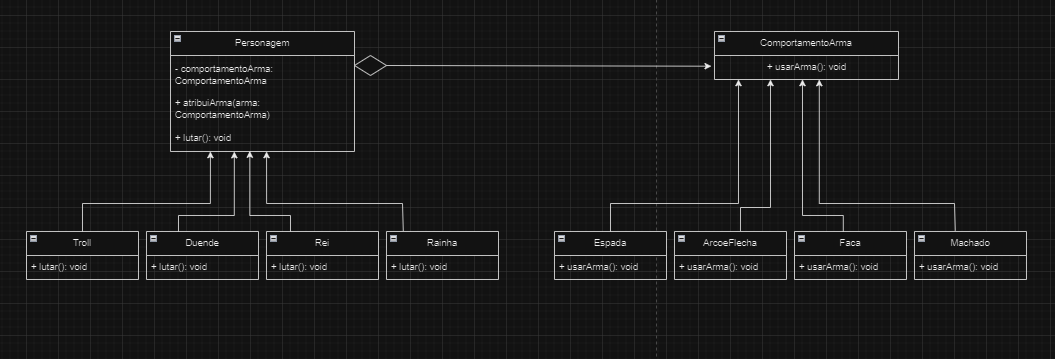

In [ ]:
from abc import ABC, abstractmethod

class ComportamentoArma(ABC):
    @abstractmethod
    def usarArma(self):
        pass

class Espada(ComportamentoArma):
    def usarArma(self):
        print("Usando uma espada!")

class ArcoEFlecha(ComportamentoArma):
    def usarArma(self):
        print("Usando um arco e flecha!")

class Machado(ComportamentoArma):
    def usarArma(self):
        print("Usando um machado!")

class Faca(ComportamentoArma):
    def usarArma(self):
        print("Usando uma faca!")

class Personagem(ABC):
    def __init__(self):
        self.comportamentoArma = None

    def atribuiArma(self, comportamentoArma: ComportamentoArma):
        self.comportamentoArma = comportamentoArma

    @abstractmethod
    def lutar(self):
        pass

    def executarAtaque(self):
        if self.comportamentoArma is not None:
            self.comportamentoArma.usarArma()
        else:
            print("Sem arma para usar!")

class Rei(Personagem):
    def lutar(self):
        print("O rei está pronto para lutar!")
        self.executarAtaque()

class Rainha(Personagem):
    def lutar(self):
        print("A rainha está pronta para lutar!")
        self.executarAtaque()

class Cavaleiro(Personagem):
    def lutar(self):
        print("O cavaleiro está pronto para lutar!")
        self.executarAtaque()

class Troll(Personagem):
    def lutar(self):
        print("O troll está pronto para lutar!")
        self.executarAtaque()

In [ ]:
rei = Rei()
rainha = Rainha()
cavaleiro = Cavaleiro()
troll = Troll()

espada = Espada()
arcoEFlecha = ArcoEFlecha()
machado = Machado()
faca = Faca()

rei.atribuiArma(espada)
rainha.atribuiArma(arcoEFlecha)
cavaleiro.atribuiArma(machado)
troll.atribuiArma(faca)

rei.lutar()
rainha.lutar()
cavaleiro.lutar()
troll.lutar()

rei.atribuiArma(faca)
rei.lutar()

**3) Implemente as questões anteriores, usando o padrão Strategy.**